<h1> <center><p style="font-name: monospace; line-height: 2; font-size: 30px; font-weight: bold; letter-spacing: 2px; text-align: center;">Sales Data Analysis</p></center> </h1>

**Introduction** 

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

## **Content**

* `Order ID` - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
* `Product` - The product that have been sold.
* `Quantity Ordered` - Ordered Quantity is the total item quantity ordered in the initial order (without any changes). 
* `Price Each` - The price of each products.
* `Order Date` - This is the date the customer is requesting the order be shipped. 
* `Purchase Address` - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

## **Target**
A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.


## **Tasks:**

* Q1: What was the best Year for sales? How much was earned that Year? 
* Q2: What was the best month for sales? How much was earned that month? 
* Q3: What City had the highest number of sales? 
* Q4: What time should we display adverstisement to maximize likelihood of customer's buying product? 
* Q5: What products are most often sold together? 
* Q6: What product sold the most? Why do you think it sold the most? 

# Import Necessary Libraries¶


In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
set_seed()

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

plt.style.use('fivethirtyeight')
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'
plt.rcParams["font.family"] = "monospace"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 1.5

print("setup-complete!")

setup-complete!


# Read The Dataset 

In [3]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv("/content/all_data.csv")

In [4]:
# Read First 10 columns
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
5,236675,Wired Headphones,1,11.99,08/02/19 23:54,"470 Hill St, San Francisco, CA 94016"
6,236676,34in Ultrawide Monitor,1,379.99,08/04/19 19:52,"470 Cherry St, Los Angeles, CA 90001"
7,236677,20in Monitor,1,109.99,08/13/19 07:16,"918 6th St, San Francisco, CA 94016"
8,236678,Wired Headphones,1,11.99,08/25/19 20:11,"58 9th St, San Francisco, CA 94016"
9,236679,Macbook Pro Laptop,1,1700.0,08/07/19 15:43,"239 Spruce St, Los Angeles, CA 90001"


# Data Preprocessing

Data preprocessing can refer to the manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects.

In [5]:
# Get the information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Uniqueness Categorical Variables
Let's have a look at categorical variables. How many unique values of these variables.

In [6]:
# getting the Uniqueness catrgorical variable
categorical = df.select_dtypes(['category', 'object']).columns 
for col in categorical:
    print('{} : {} unique values'.format(col, df[col].nunique()))

Order ID : 178438 unique values
Product : 20 unique values
Quantity Ordered : 10 unique values
Price Each : 24 unique values
Order Date : 142396 unique values
Purchase Address : 140788 unique values


### **How many missing data points do we have?**
Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [7]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print("****************************************************")
    print(column)
    print (missing_data[column].value_counts())
    print("")    

****************************************************
Order ID
False    186305
True        545
Name: Order ID, dtype: int64

****************************************************
Product
False    186305
True        545
Name: Product, dtype: int64

****************************************************
Quantity Ordered
False    186305
True        545
Name: Quantity Ordered, dtype: int64

****************************************************
Price Each
False    186305
True        545
Name: Price Each, dtype: int64

****************************************************
Order Date
False    186305
True        545
Name: Order Date, dtype: int64

****************************************************
Purchase Address
False    186305
True        545
Name: Purchase Address, dtype: int64



I find it good to know the percentage of missing values in our data set to give us a better idea of the scale of this problem:

In [8]:
# how many total missing values do we have?
missing_data = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_data.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"{percent_missing:.2f}%")

0.29%


I see the percentage of missing value is not big

If we look here at the percentage of lost data, we will see it few, and here I will ask a question, which is what is the reason for losing that data, but here I will encounter a problem, which is that I do not know the source of the real data, so I will delete it and I see that it was not large enough to affect the data.

**Clean up the Data!**

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

In [9]:
# let's drop the rows of NaN data!
df = df.dropna(how='all')
df[df.isna().any(axis=1)]
print("*******************************")
# future warning! ValueError: invalid literal for int() with base 10: 'Or'
print("Clean Future Warnings:")
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


*******************************
Clean Future Warnings:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


**Convert Quantity Ordered column and Price Each column**

I will convert the Quantity Ordered column and Price Each column to Numeric Type, because we will add some future features, and we need to multiply these two-column.

In [10]:
# we can convert the data
df['Quantity Ordered'], df['Price Each'] = df['Quantity Ordered'].astype('int64'), df['Price Each'].astype('float')
# we can check it 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


**Convert Order Date column**

And I will convert the Order Date column, so I can easily take the Year, Month, and the other date.

In [11]:
# I will convert it by using to_datetime() function
df['Order Date'] = pd.to_datetime(df['Order Date'])
# let's see it
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


# Data Preparation

Data preparation is the act of manipulating raw data into a form that can readily and accurately be analyzed, e.g. for business purposes. Data Preparation is a pre-processing step in which data from one or more sources is cleaned and transformed to improve its quality prior to its use in business analytics.

Add Month, Hour, Minute, Sales, Cities Column Like Columns in the data 

In [12]:
def augment_data(data):
    
    """
    Here I will add to the data columns (Houre and Minute sales and Cities)
    """
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data # returning data

# and see it
df = augment_data(df)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY)


# Data Analysis

Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. Indeed, researchers generally analyze for patterns in observations through the entire data collection phase analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

Calculate the Corrolation 

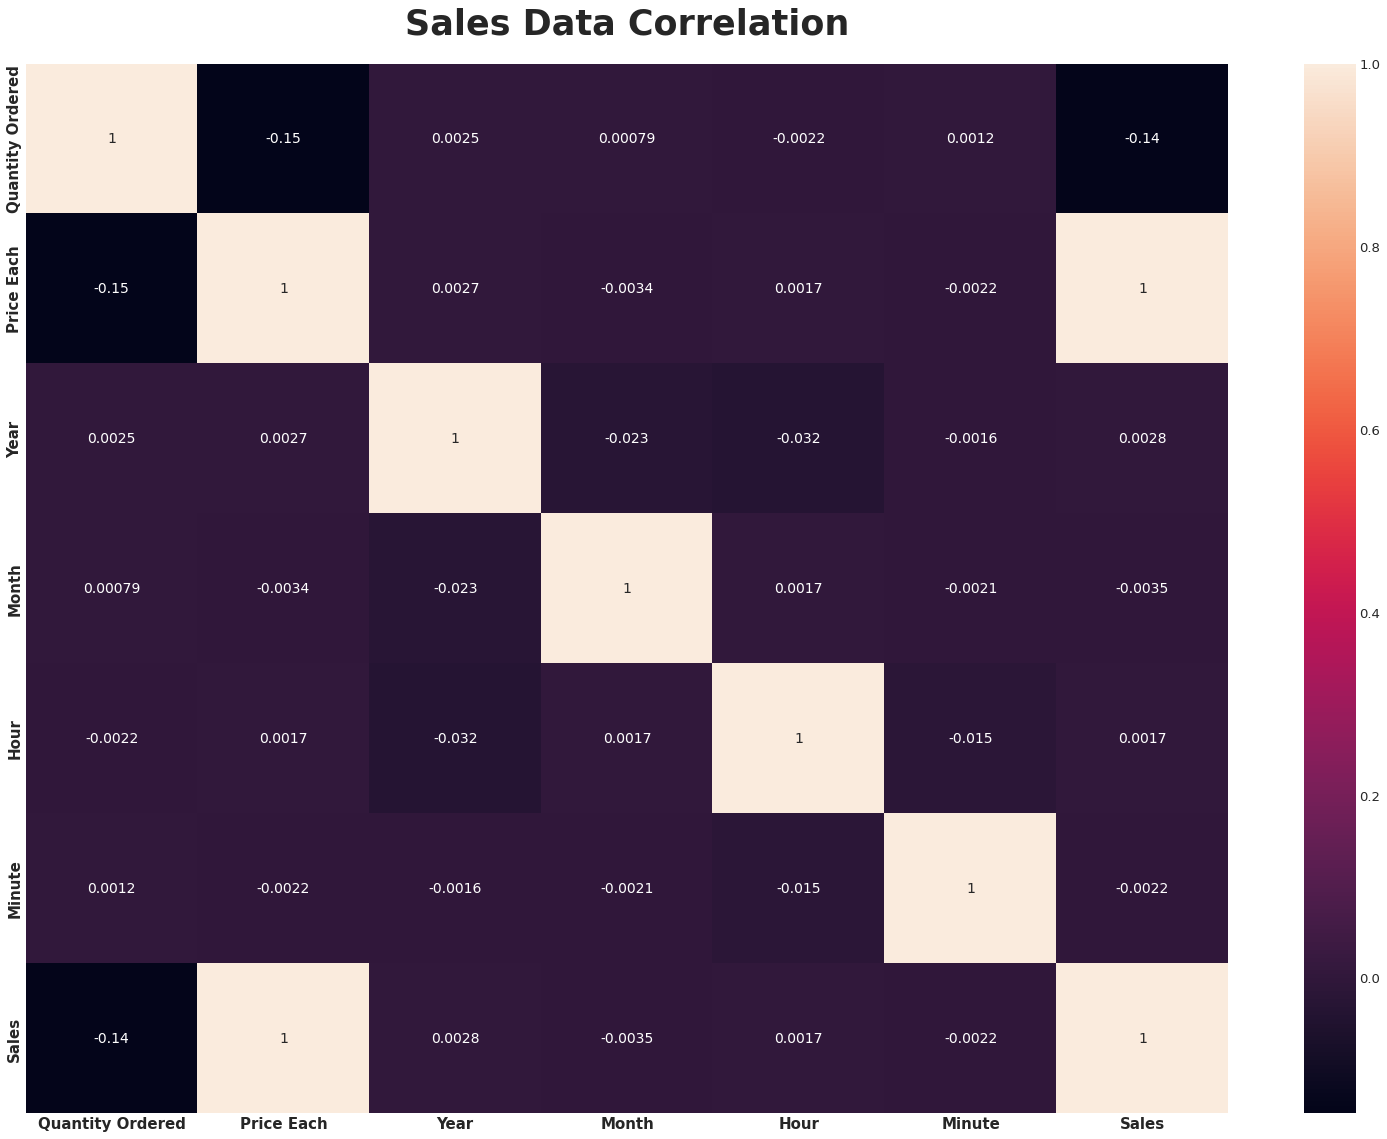

In [13]:
sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(24, 18)) # figure the size
sns.heatmap(df.corr(), annot=True) # create a heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [14]:
# Let's see the correlation from `sales_data`
(df.corr()['Sales'] 
           .sort_values(ascending=False) # sort values
           .to_frame() # change it into data frame
           .T) # transpose it

,Sales,Price Each,Year,Hour,Minute,Month,Quantity Ordered
Sales,1.0,0.999203,0.002824,0.001668,-0.002162,-0.003466,-0.139417


In [15]:
# statistical measure of sales data without object type of data
sales_data_numeric = df.describe(include=[np.number]) 
print("Statistical Measure of Sales Data in Numeric Data")
sales_data_numeric

Statistical Measure of Sales Data in Numeric Data


,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


# Univariate Analysis

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. 


In [16]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
   
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    ) 
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

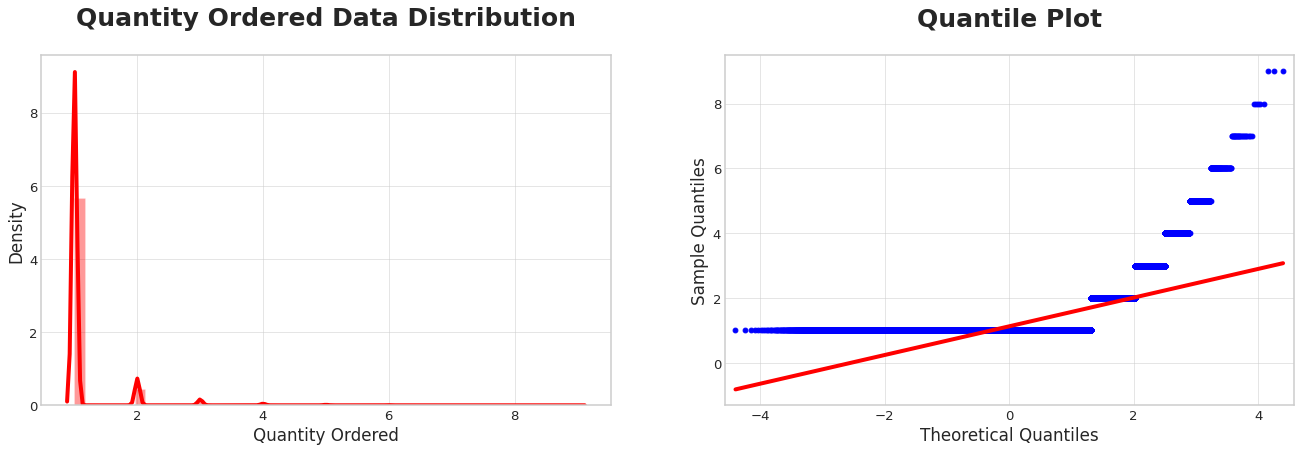

In [17]:
# Quantity Ordered Data
univariate_analysis( # call the function
    data=df['Quantity Ordered'], # put the data
    color='red', # pick the color
    title1='Quantity Ordered Data Distribution', # title1
    title2='Quantile Plot' # title2
);

Here we can see it, the average customer buys $1$ item/product more often, there are also a few customers who buy $2$ or $4$ items/product at once, more than that it is very rare.

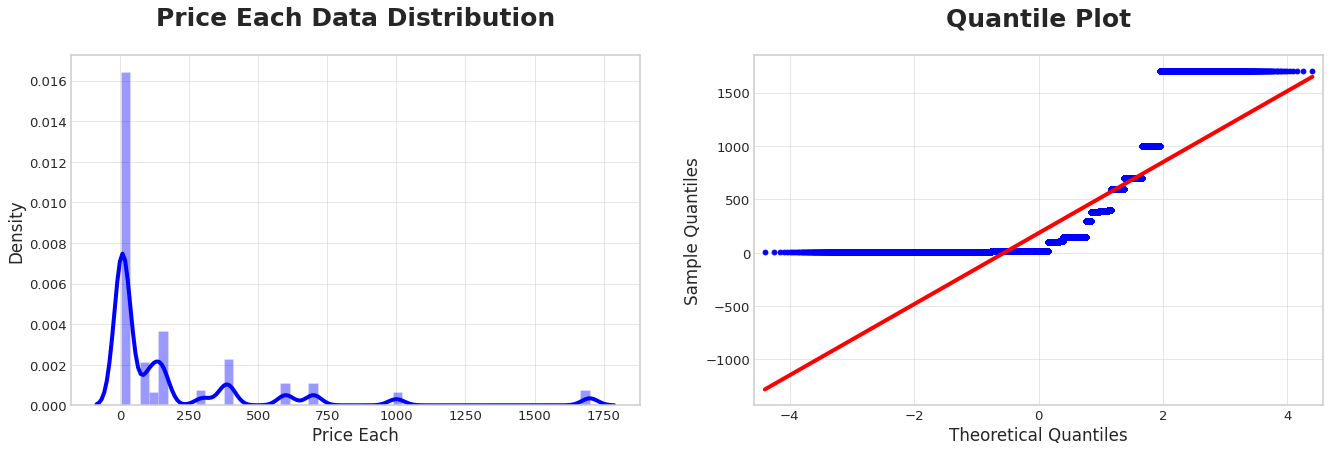

In [18]:
# Price Each Data
univariate_analysis( # call the function
    data=df['Price Each'], # put the data
    color='blue', # pick the color 
    title1='Price Each Data Distribution', # title1 
    title2='Quantile Plot' # title2
);

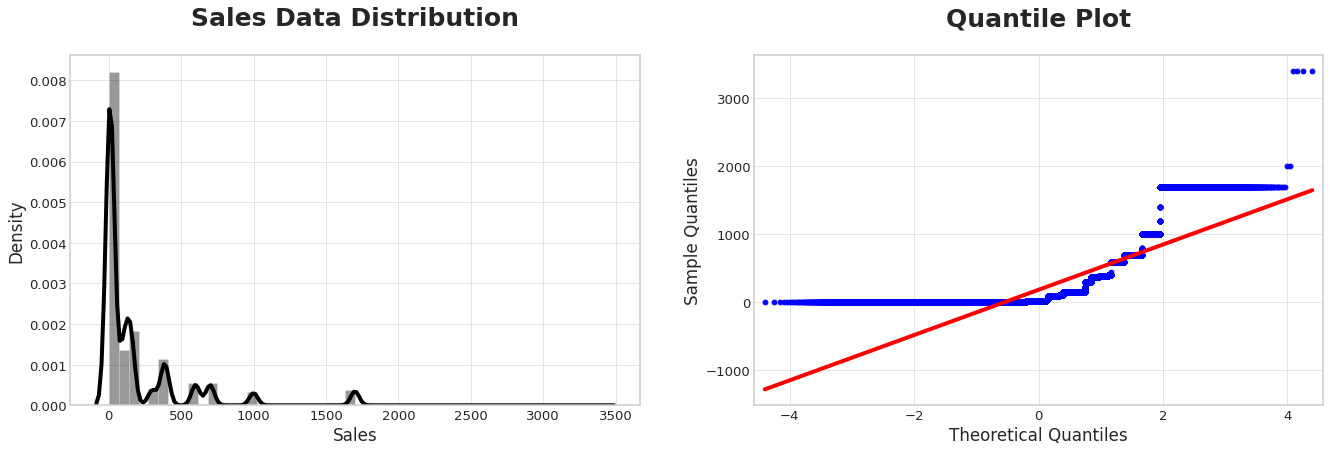

In [19]:
# Sales Data
univariate_analysis( # call the function
    data=df['Sales'], # put the data 
    color='black', # pick the color
    title1='Sales Data Distribution', # title1 
    title2='Quantile Plot' # title2
);

In [20]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = df.skew().sort_values(ascending=False).to_frame()
skew_value

,0
Year,73.933795
Quantity Ordered,4.833164
Sales,2.881913
Price Each,2.872149
Minute,0.002580
Order ID,0.000719
Month,-0.088588
Hour,-0.530377


# Taskes

### Q1: What was the best Year for sales? How much was earned that Year? 

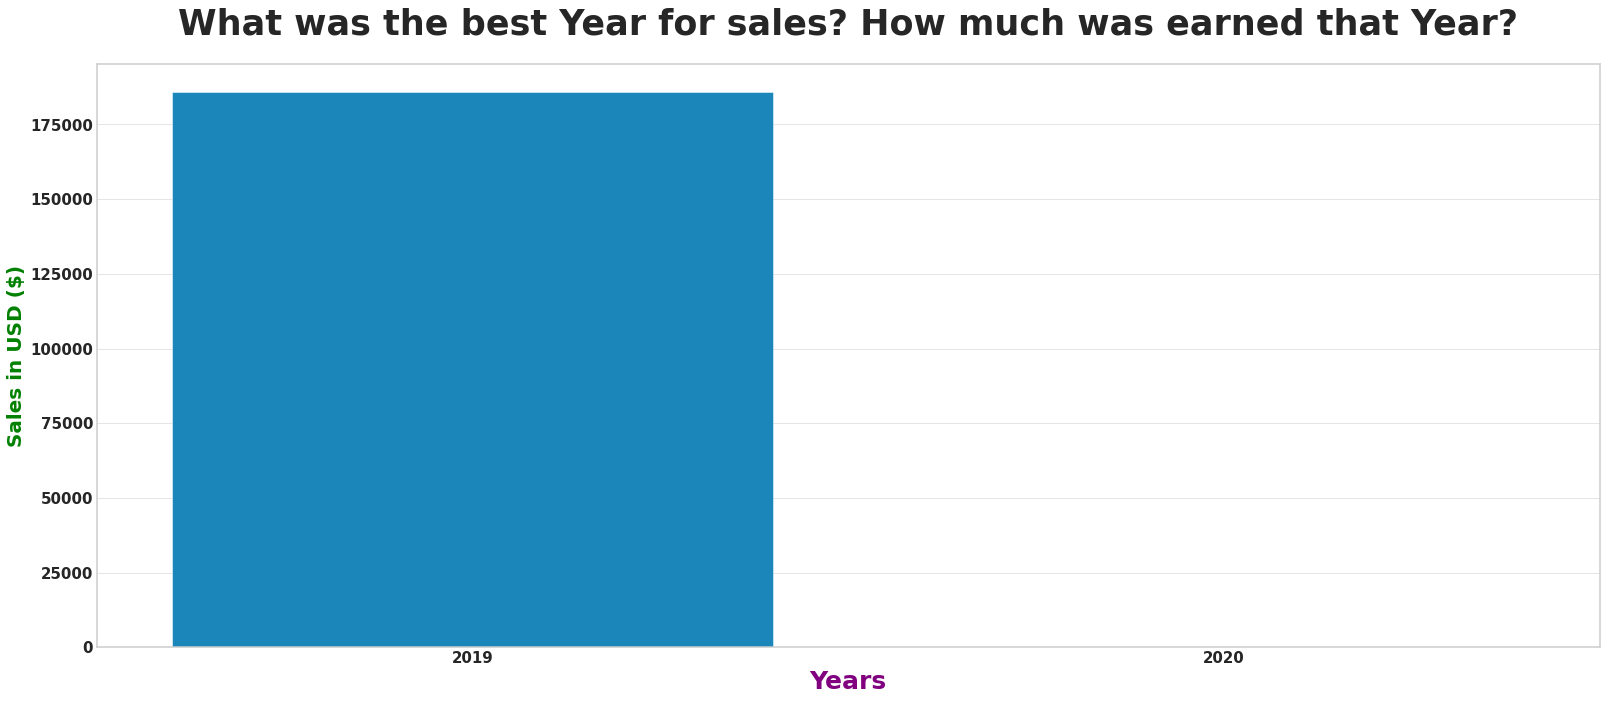

In [21]:
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes count plot 
sns.countplot(
    x="Year", 
    data=df
)
plt.title( # title
    "What was the best Year for sales? How much was earned that Year?", 
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### ***Answer:***

> When I viewed from the data above, $2019$ was the best year that had the highest number of sales, which was $\$34,483,365$, compared to $2020$ which only had $\$8,670$ in sales, this is due to the lack of data in $2020$ which caused a data imbalance.

Q2: What was the best month for sales? How much was earned that month?

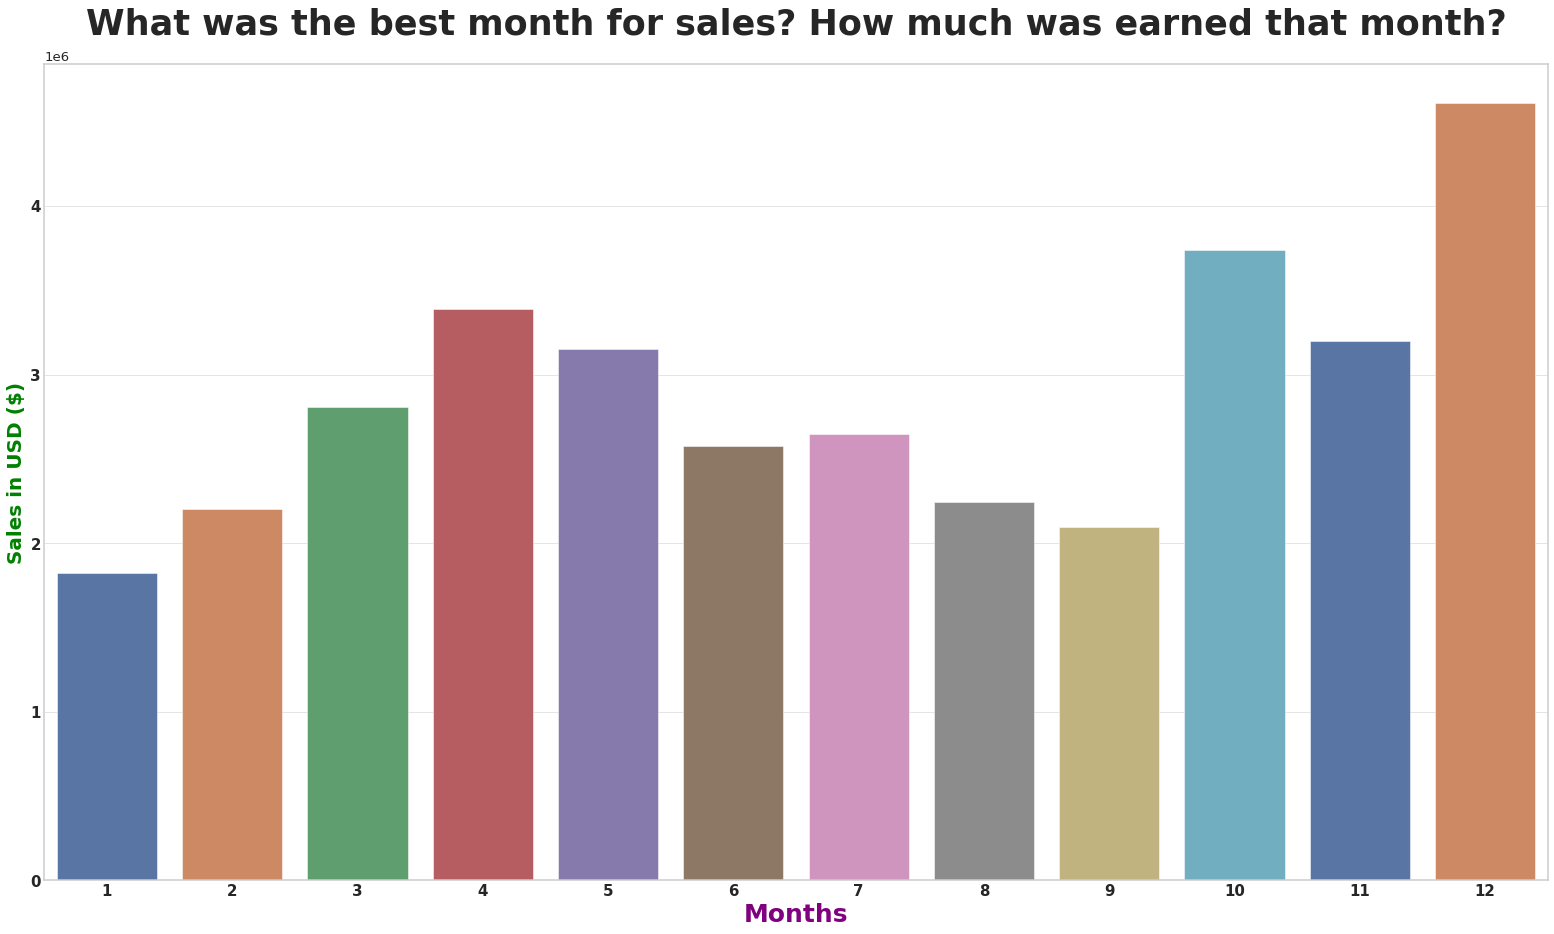

In [22]:
# group the Month cols
sum_of_month_and_earned = df.groupby('Month').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=sum_of_month_and_earned.index, # x-axis
    y=sum_of_month_and_earned["Sales"], # y-axis
    data=sum_of_month_and_earned, # data
    palette="deep" # palette
)
plt.title( # title
    "What was the best month for sales? How much was earned that month?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Months", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### ***Answer:***

> The best month to sell is shown in the visualization above is December(12) which has a record number of sales reaching $\$4,613,443$, sales,This may be because in December there is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones.

### Q3: What City had the highest number of Sales?

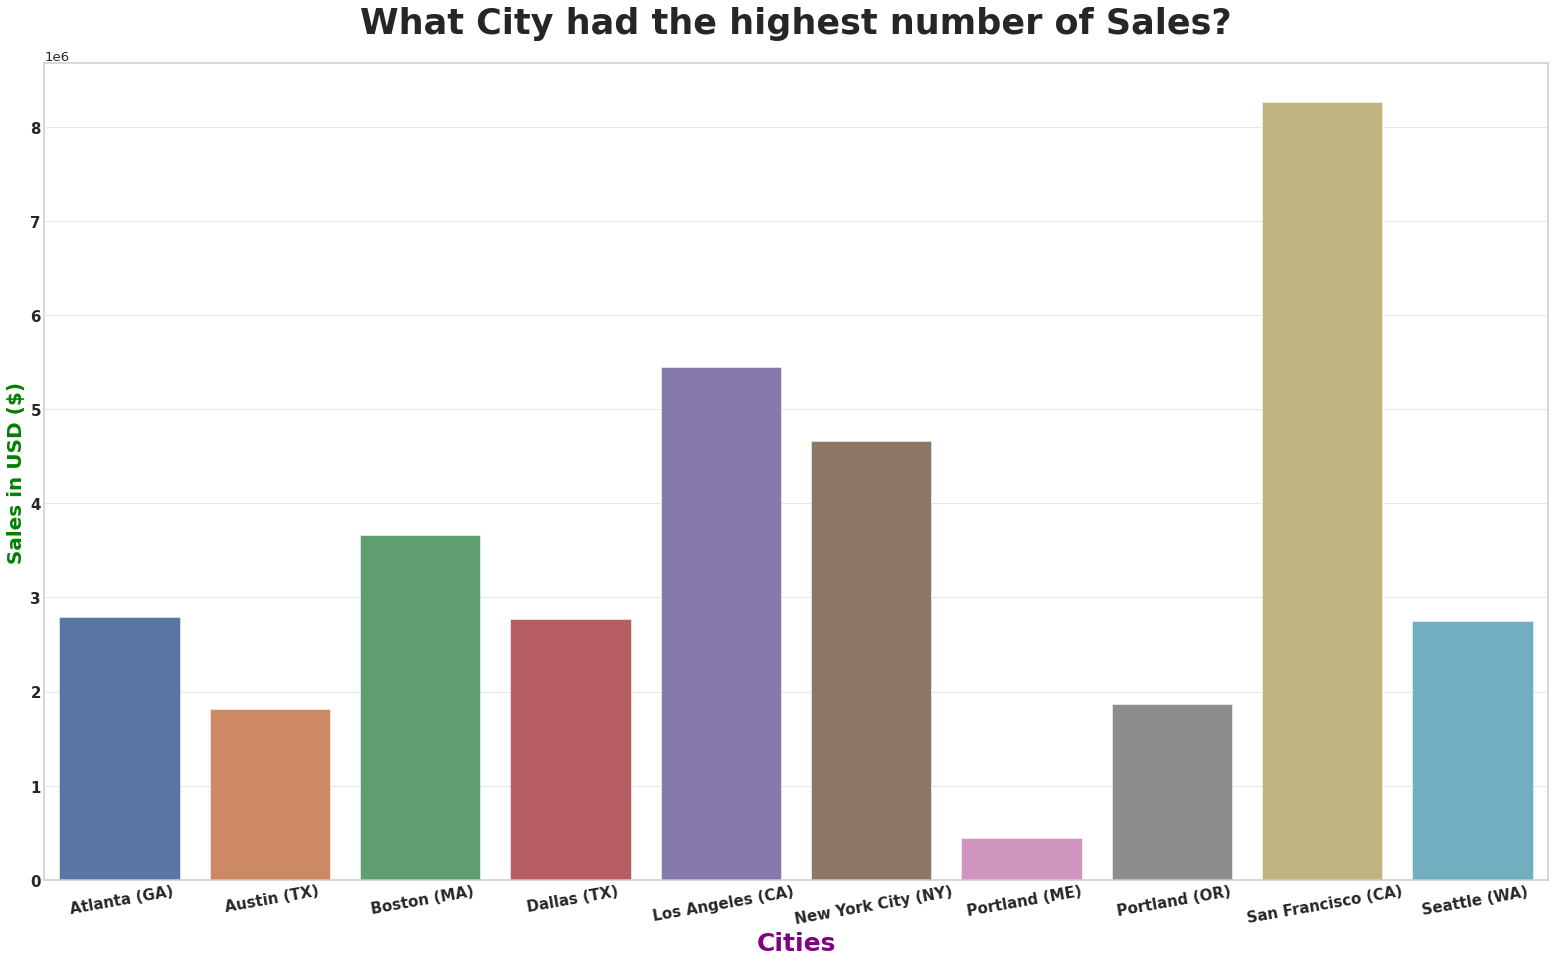

In [23]:
# group of the highest number of sales in city
highest_number_of_sales = df.groupby('Cities').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "What City had the highest number of Sales?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### ***Answer:***

> The city that has the most sales data in the above visualization is San Francisco, with total sales reaching $\$8,262,203$.

# Q4:What time should we display adverstisement to maximize likelihood of customer's buying product?

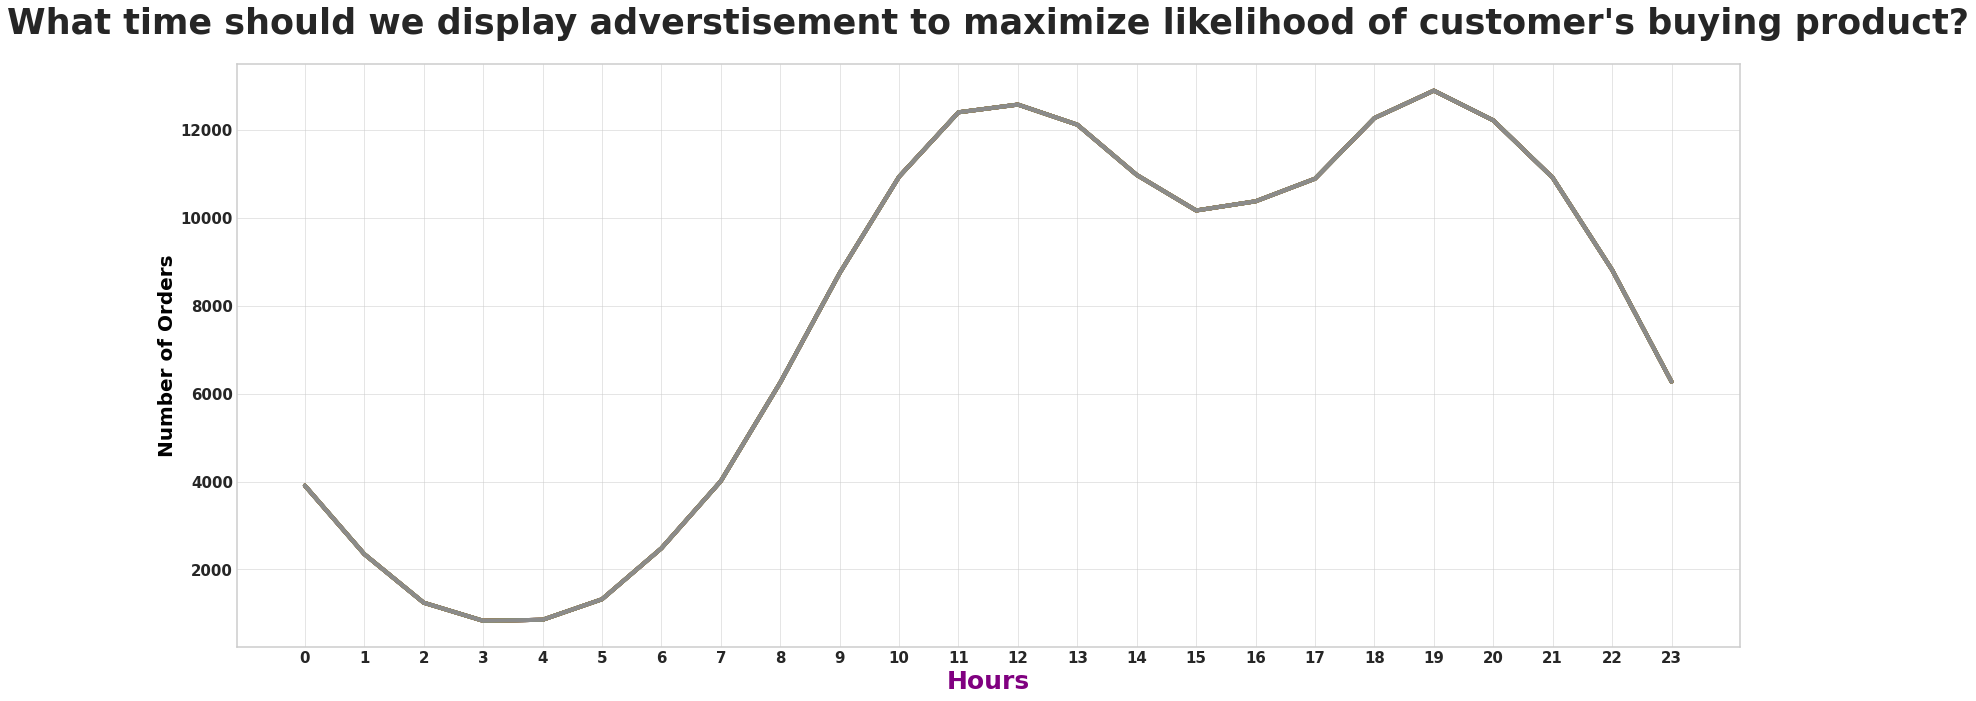

In [24]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in df.groupby('Hour')]
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
plt.plot( # plot
    hours, # x-axis
    df.groupby(['Hour']).count() # data
)
# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders", 
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### ***Answer:***

If we look at the drawn figure, we will find that at nine o'clock in the morning there is a large turnout of requests and advertisements at that time

Q5: What products are most often sold together?

In [25]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Answer:**

Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  1005  orders, and Google Phone, USB-C Charging Cable ranked second with  987  orders.

### Q6: What product sold the most? Why do you think it sold the most?

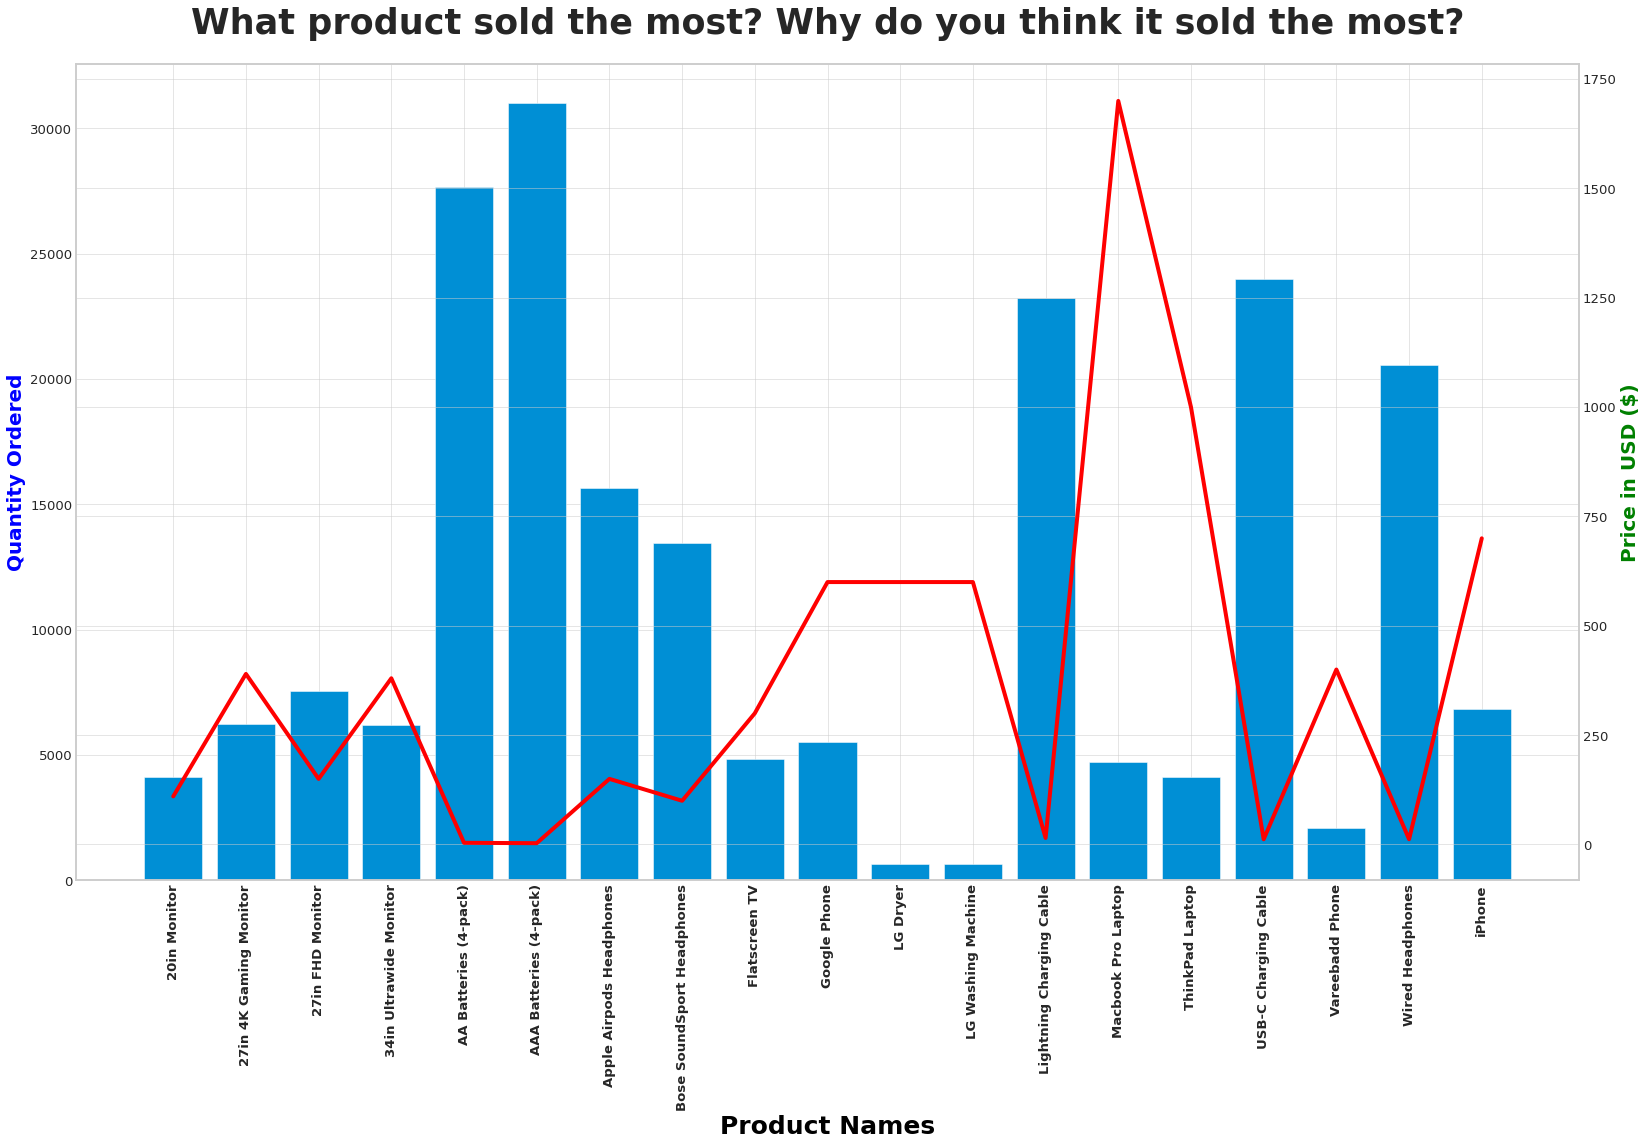

In [26]:
# lets prepare the varables for the plotting
# group the product
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
"""Visualization"""
# let's make a subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()
# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "What product sold the most? Why do you think it sold the most?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
ax1.set_xlabel( # x-label
    "Product Names",
    weight="bold", # weight
    fontsize=25, # font-size
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered", 
    color="blue", # color
    fontsize=20, # font-size
    weight="bold" # weight
)
ax1.set_xticklabels( # x-ticks
    products, # ticks
    rotation="vertical", # rotation 
    weight="bold" # weight
)
# AXES 2
sns.lineplot( # plot
    products, # x-axis
    prices, # y-axis
    color="red"
)
ax2.set_ylabel( # y-label
    "Price in USD ($)", 
    color="green", # color
    fontsize=20, # font-size
    weight="bold" # weight
);

**Answer:**

The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging cables, USB-C Charging cables, and Wired Headphones. Why do these products sell more than others? This is because the prices of the most ordered products have a low price compared to other products, for example, the LG Dryer, or the LG Washing Machine, which have a price of around  $500−700.

# Some additional questions

In [27]:
# The equation that we will use it
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = df.Product.value_counts().sum() 

How much probability for next people will order USB-C Charging Cable?

In [28]:
usb_charging = df[df.Product == 'USB-C Charging Cable'].value_counts().sum()
# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%


**Answer** 

The probability for next people will order USB-C Charging Cable is  12% , Because there are only  12%  chance we can say this an unusual event.

How much probability for next people will order iPhone?

In [29]:
iphone = df[df.Product == 'iPhone'].value_counts().sum()
# Calculating iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%


**Answer**

The probability for next people will order iPhone is  4% , Because there are only  4%  chance we can say this an unusual event.

How much probability for next people will order Google Phone?

In [30]:
google_phone = df[df.Product == 'Google Phone'].value_counts().sum()
# Calculating Google Phone Probability
P_google_phone = statistical_probability(google_phone, product)
Pprime_google_phone = 1 - P_google_phone
print('Probability for next people will order Google Phone: %.2f%%' % P_google_phone)
print('Probability for next people will not order Google Phone: %.2f%%' % Pprime_google_phone)

Probability for next people will order Google Phone: 0.03%
Probability for next people will not order Google Phone: 0.97%


**Answer**

The probability for next people will order Google Phone is  3% , Because there are only  3%  chance we can say this an unusual event.

How much probability for next people will order Wired Headphones?

In [31]:
wired_headphones = df[df.Product == 'Wired Headphones'].value_counts().sum()
# Calculating Wired Headphones Probability
P_wired_headphones = statistical_probability(wired_headphones, product)
Pprime_wired_headphones = 1 - P_wired_headphones
print('Probability for next people will order Wired Headphones: %.2f%%' % P_wired_headphones)
print('Probability for next people will not order Wired Headphones: %.2f%%' % Pprime_wired_headphones)

Probability for next people will order Wired Headphones: 0.10%
Probability for next people will not order Wired Headphones: 0.90%


**Answer**

The probability for next people will order Wired Headphones is  10% , Because there are only  10%  chance we can say this an unusual event.

# Conclusion 

2019  was the best year that had the most sales, which was  $34,483,365 , compared to  2020  which only had  $8,670 . this is due to data shortage in  2020  which causes data imbalance, I need  2020  data to be able to continue this data analysis. The best month to sell if shown in the visualization above is December which has a record number of sales reaching  $4,613,443 , sales. This may be because December is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones. The city that has the most sales data in the above visualization is the city of San Francisco, with total sales reaching  $8,262,203 .